# Pandas Data Types
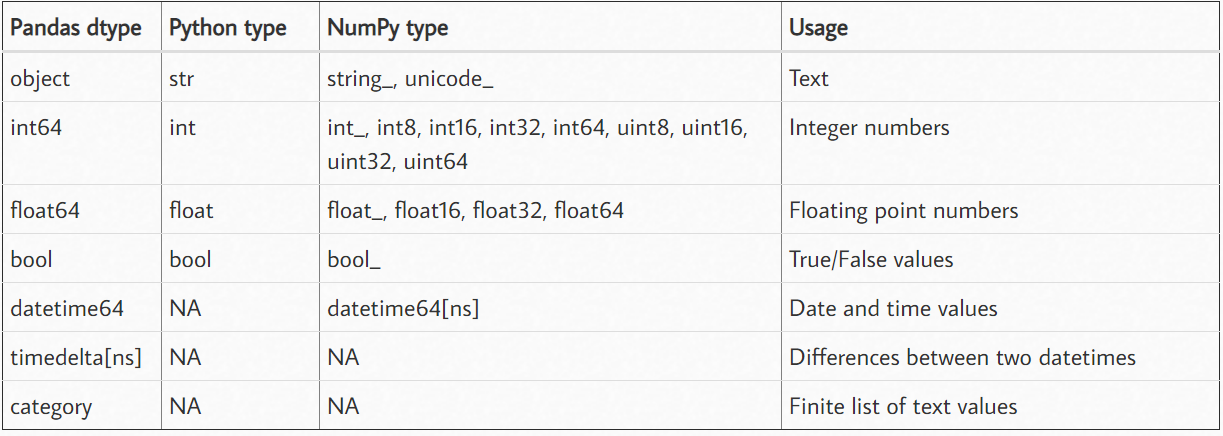


In [1]:
import pandas as pd
import numpy as np

In [44]:
df = pd.read_csv("https://github.com/chris1610/pbpython/blob/master/data/sales_data_types.csv?raw=True")

In [45]:
df

,Customer Number,Customer Name,2016,2017,Percent Growth,Jan Units,Month,Day,Year,Active
0,10002.0,Quest Industries,"$125,000.00",$162500.00,30.00%,500,1,10,2015,Y
1,552278.0,Smith Plumbing,"$920,000.00","$101,2000.00",10.00%,700,6,15,2014,Y
2,23477.0,ACME Industrial,"$50,000.00",$62500.00,25.00%,125,3,29,2016,Y
3,24900.0,Brekke LTD,"$350,000.00",$490000.00,4.00%,75,10,27,2015,Y
4,651029.0,Harbor Co,"$15,000.00",$12750.00,-15.00%,Closed,2,2,2014,N


# .info() method

**Syntax:**

DataFrame.info(verbose=None, buf=None, max_cols=None, memory_usage=None, null_counts=None)

**Function:**

Use df.info and df.dtypes to look at the types that pandas automatically infers based on the data
Print a concise summary of a DataFrame

**Returns:**
This method prints a summary of a DataFrame and returns None.


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 10 columns):
Customer Number    5 non-null float64
Customer Name      5 non-null object
2016               5 non-null object
2017               5 non-null object
Percent Growth     5 non-null object
Jan Units          5 non-null object
Month              5 non-null int64
Day                5 non-null int64
Year               5 non-null int64
Active             5 non-null object
dtypes: float64(1), int64(3), object(6)
memory usage: 480.0+ bytes


In [5]:
df['2016'] + df['2017']

0      $125,000.00$162500.00
1    $920,000.00$101,2000.00
2        $50,000.00$62500.00
3      $350,000.00$490000.00
4        $15,000.00$12750.00
dtype: object

# .astype() method

**Syntax:**

DataFrame.astype(dtype, copy=True, errors='raise', **kwargs)

**Function:**

Cast a pandas object to a specified dtype dtype.

**Returns:**

casted : type of caller


#astype can take a dictionary of column names and data types

The simplest way to to convert to a type is using **astype**

In [6]:
df['Customer Number'].astype('int')

0     10002
1    552278
2     23477
3     24900
4    651029
Name: Customer Number, dtype: int32

# .dtypes () method

**Syntax:**

DataFrame.dtypes

**Function**:

Return the dtypes in the DataFrame

**Returns:**

pandas.Series

The data type of each column

In [28]:
df.dtypes

Customer Number      int32
Customer Name       object
2016               float64
2017               float64
Percent Growth     float64
Jan Units          float64
Month                int64
Day                  int64
Year                 int64
Active              object
dtype: object

The code above does not alter the original dataframe.

Assign the new integer customer number back to the original frame and check the type

In [8]:
df["Customer Number"]=df['Customer Number'].astype('int')
df.dtypes

Customer Number     int32
Customer Name      object
2016               object
2017               object
Percent Growth     object
Jan Units          object
Month               int64
Day                 int64
Year                int64
Active             object
dtype: object

In [9]:
df.astype({'Customer Number':'int','Customer Name':'str'}).dtypes

Customer Number     int32
Customer Name      object
2016               object
2017               object
Percent Growth     object
Jan Units          object
Month               int64
Day                 int64
Year                int64
Active             object
dtype: object

In [43]:
df

,year,month,day
0,2015,2,4
1,2016,3,5


The data all looks good for the Customer Number.

If we try to convert the Jan Units column, we will get an error because of the $ and % signs.

df['Jan Units'].astype('int')==> ValueError

df['2016'].astype('float')==> ValueError

In order to convert the currency and percentages, we need to use custom functions

In [11]:
def convert_currency(val):
    """
   convert the string number value to a float
   - Remove $
   - Remove commas
   - Convert to float type
   """
    new_val = val.replace(',','').replace('$','')
   
    return float(new_val)
   

In [12]:
def convert_percent(val):
    
    """
    Conver the percentage string ot an actual floating point percent
    """
    new_val=val.replace('%','')
    return float(new_val)/100

# pandas.DataFrame.apply

**Syntax:**
DataFrame.apply(func, axis=0, broadcast=None, raw=False, reduce=None, result_type=None, args=(), **kwds)

**Function:**The method returns: Series or DataFrame

Apply a function along an axis of the DataFrame. Objects passed to the function are Series objects whose index is either the DataFrame’s index (axis=0) or the DataFrame’s columns (axis=1). By default (result_type=None), the final return type is inferred from the return type of the applied function. Otherwise, it depends on the result_type argument.

In [ ]:
df['2016'].apply(convert_currency)

In [ ]:
df['2017'].apply(convert_currency)

# Lambda function

A lambda function is a small anonymous function.

#A lambda function can take any number of arguments, but can only have one expression.

syntax: 

lambda arguments : expression

Eg:
x = lambda a : a + 10

print(x(5))

In [ ]:
df['2016'].apply(lambda x: x.replace('$','').replace(',','')).astype('float')

In [13]:
#Assign the converted values back to the columns
df['2016'] = df['2016'].apply(convert_currency)
df['2017'] = df['2017'].apply(convert_currency)

In [16]:
#Use a lambda function to convert the percentage strings to numbers
df['Percent Growth'].apply(lambda x: x.replace('%','')).astype('float')/100

0    0.30
1    0.10
2    0.25
3    0.04
4   -0.15
Name: Percent Growth, dtype: float64

In [18]:
df['Percent Growth']=df['Percent Growth'].apply(convert_percent)

# pd.to_numeric 

pd.to_numericis another option for handling column conversions when invalid values are included

**Syntax:**

pandas.to_numeric(arg, errors='raise', downcast=None)


arg : list, tuple, 1-d array, or Series

errors : {‘ignore’, ‘raise’, ‘coerce’}, default ‘raise’

If ‘raise’, then invalid parsing will raise an exception

If ‘coerce’, then invalid parsing will be set as NaN

If ‘ignore’, then invalid parsing will return the input

**Function:**

Convert argument to a numeric type.

**Returns:**

ret : numeric if parsing succeeded.

Return type depends on input. Series if Series, otherwise ndarray



In [22]:
df['Jan Units'] = pd.to_numeric(df['Jan Units'],errors='coerce')

0    500.0
1    700.0
2    125.0
3     75.0
4      NaN
Name: Jan Units, dtype: float64

# .fillna()
Fill in the NaN with a specified value using method **.fillna()**

**Syntax:** 

DataFrame.fillna(value=None, method=None, axis=None, inplace=False, limit=None, downcast=None, **kwargs)

value:scalar, dict, Series, or DataFrame

**Return:** filled :DataFrame

In [25]:
df['Jan Units'] = pd.to_numeric(df['Jan Units'], errors='coerce').fillna(0)

In [35]:
df.dtypes

Customer Number      int32
Customer Name       object
2016               float64
2017               float64
Percent Growth     float64
Jan Units          float64
Month                int64
Day                  int64
Year                 int64
Active              object
dtype: object

# pd.to_datetime() function

This function is quite configurable but also pretty smart by default.

**Syntax:**
pandas.to_datetime(arg, errors='raise', dayfirst=False, yearfirst=False, utc=None, box=True, format=None, exact=True, unit=None, infer_datetime_format=False, origin='unix', cache=False)

arg : integer, float, string, datetime, list, tuple, 1-d array, Series, DataFrame/dict-like

**Function:**

Convert argument to datetime.

**Returns:**

datetime if parsing succeeded.

Return type depends on input:

list-like: DatetimeIndex

Series: Series of datetime64 dtype

scalar: Timestamp

In case when it is not possible to return designated types (e.g. when any element of input is before Timestamp.min or after Timestamp.max) return will have datetime.datetime type (or corresponding array/Series).

Assembling a datetime from multiple columns of a DataFrame. The keys can be common abbreviations 
like [‘year’, ‘month’, ‘day’, ‘minute’, ‘second’, ‘ms’, ‘us’, ‘ns’]) or plurals of the same

In [47]:
#From the previous example, convert 3 columns with column names "month","year","day" into a datetime
#pd.to_datetime is very useful for working with date conversions
pd.to_datetime(df[['Month', 'Day', 'Year']])

0   2015-01-10
1   2014-06-15
2   2016-03-29
3   2015-10-27
4   2014-02-02
dtype: datetime64[ns]

In [41]:
df = pd.DataFrame({'year': [2015, 2016],
                       'month': [2, 3],
                       'day': [4, 5]})
pd.to_datetime(df)

0   2015-02-04
1   2016-03-05
dtype: datetime64[ns]

In [40]:
#Passing errors=’coerce’ will force an out-of-bounds date to NaT, in addition to forcing non-dates (or non-parseable dates) to NaT.
pd.to_datetime('13000101', format='%Y%m%d', errors='coerce')

NaT

In [39]:
#speed up convertion by 5 or 10 times by setting infer_datetime_format=True

s = pd.Series(['3/11/2000', '3/12/2000', '3/13/2000']*1000)

%timeit pd.to_datetime(s,infer_datetime_format=True)

5.87 ms ± 108 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [37]:
#Using a unix epoch time
pd.to_datetime(1490195805, unit='s')
#Timestamp('2017-03-22 15:16:45')

Timestamp('2017-03-22 15:16:45')

# np.where() function

In [ ]:
df["Active"] = np.where(df["Active"] == "Y", True, False)

# pandas.read_csv function



**Syntax:**

pandas.read_csv(**filepath_or_buffer**, **sep=', '**, **delimiter=None**, **header='infer'**, names=None, index_col=None, usecols=None, squeeze=False, prefix=None, mangle_dupe_cols=True, **dtype=None**, engine=None, **converters=None**, true_values=None, false_values=None, skipinitialspace=False, skiprows=None, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, skip_blank_lines=True, parse_dates=False, infer_datetime_format=False, keep_date_col=False, date_parser=None, dayfirst=False, iterator=False, chunksize=None, compression='infer', thousands=None, decimal=b'.', lineterminator=None, quotechar='"', quoting=0, escapechar=None, comment=None, encoding=None, dialect=None, tupleize_cols=None, error_bad_lines=True, warn_bad_lines=True, skipfooter=0, doublequote=True, delim_whitespace=False, low_memory=True, memory_map=False, float_precision=None)

It is helpful to think of dtype as performing astype() on the data. The converters arguments allow you to apply functions to the various input columns similar to the approaches outlined above. **It is important to note that you can only apply a dtype or a converter function (arguments) to a specified column once using this approach. If you try to apply both to the same column, then the dtype will be skipped.**

**Function:**

Read CSV (comma-separated) file into DataFrame

Also supports optionally iterating or breaking of the file into chunks.

**Returns:**

result : DataFrame or TextParser

**Syntax:**


**Function:**


**Returns:**

In [50]:
# you can convert data types of some columns while using the read_csv function

df_2 = pd.read_csv("https://github.com/chris1610/pbpython/blob/master/data/sales_data_types.csv?raw=True",
                   dtype={'Customer Number': 'int'},
                   converters={'2016': convert_currency,
                               '2017': convert_currency,
                               'Percent Growth': convert_percent,
                               'Jan Units': lambda x: pd.to_numeric(x, errors='coerce'),
                               'Active': lambda x: np.where(x == "Y", True, False)
                              })

# convert the  Monday Day Year columns into a new column called "start_date"

df_2["Start_Date"] = pd.to_datetime(df[['Month', 'Day', 'Year']])

print(df_2)

   Customer Number     Customer Name      2016       2017  Percent Growth  \
0            10002  Quest Industries  125000.0   162500.0            0.30   
1           552278    Smith Plumbing  920000.0  1012000.0            0.10   
2            23477   ACME Industrial   50000.0    62500.0            0.25   
3            24900        Brekke LTD  350000.0   490000.0            0.04   
4           651029         Harbor Co   15000.0    12750.0           -0.15   

   Jan Units  Month  Day  Year Active Start_Date  
0      500.0      1   10  2015   True 2015-01-10  
1      700.0      6   15  2014   True 2014-06-15  
2      125.0      3   29  2016   True 2016-03-29  
3       75.0     10   27  2015   True 2015-10-27  
4        NaN      2    2  2014  False 2014-02-02  
